A schelling model with continuous wealth and agent exchange rule(wealth can be seen as a "continuous differentiator", for now )(this can bbe used to show that athough we model it the shift as an agents choice,however in the market this affordability paradigm naturally arises from the average wealth of the neighbourhood(houses themselves being assets))

Start with 1 type of agents and consider Moore neighborhood of every agent

(This could be used to give every box the agent occupies as a house and a price could be fixed for each plot(just an idea) )

Reference: 10.1140/epjb/e2020-100534-7


Trying to investigate relation between gini index of agents and mean path length(change in wealth) of agents between trades

In [213]:
import numpy as np
import random
import math
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import colors


# Initialising all the variables

In [214]:
Temperature=0
width=50 #width of the landscape(x)
length=50#length of the landscape(y)
percent_type_1=0.5
percent_type_2=(1-percent_type_1)
number_of_agents=math.floor((width*length))
numberof1s=math.floor(percent_type_1*number_of_agents)
numberof2s=number_of_agents-numberof1s
vacant_tiles= (length*width)-number_of_agents
x=np.arange(0,width,1)#initialize the grid
y=np.arange(0,length,1)#initialize the grid
#np.random.shuffle(x)
#np.random.shuffle(y)
avg_wealth=100
stdev=5
wealth=np.absolute(np.ones(number_of_agents))#normal(avg_wealth,stdev,number_of_agents))
randomallocatecoord=np.arange(0,length*width,1)#Help randomly intialiize initial position of the agents
np.random.shuffle(randomallocatecoord)
tolerance=np.ones(number_of_agents)*3
#tolerance[0:3]=0
#tolerance[number_of_agents-4:number_of_agents-1]=0
track=np.zeros((length,width)) #a golobal variable to track which agent is in which position
savingprop=np.zeros(number_of_agents)

Temperaturetime=[0,0.5,1,1.5,2,2.5,5,7.5,8,8.5,9,9.5,10,10.5,11,12,15,20,-1]
Money_distribution_pdf_temperature=[]
variance_mean_path_length_over_Temperature=[] 
mean_path_length_avg_agent_over_Temperature=[]
giniwrtTemp=[]
weights=np.arange(1,number_of_agents+1,1)
  



# Other things


In [215]:
class Agent():
    coord=[]
    def __init__(self,i,x_coord,y_coord,wealth_agent,toler,type,saving_prop):
        self.agent_id=i
        self.coord=[x_coord,y_coord]
        self.wealth=wealth_agent
        self.tol=toler
        self.type=type
        self.savings=saving_prop
    print(coord)


[]


Allocate coordinates to the agents randomly and also store the location of vacant cells

In [216]:

randomallocatecoord=np.arange(0,length*width,1)
agents=[] #agents indexed by agent id
vacant=[]
track=(np.ones((length,width))*(-1)).astype(int)#agentid indexed by their coordinates
j=0
y_coord=-1
x_coord=-1
np.random.shuffle(randomallocatecoord)
for i in range(length*width): # i represents the agent number and not the grid position
   x_coord=int(randomallocatecoord[i]%length)
   y_coord=int((randomallocatecoord[i]/width))
   
   if i<number_of_agents: # while loop running over the agent indices
      if i<numberof1s : #first set are agents of type 1
        agents.append(Agent(i,x_coord,y_coord,wealth[i],tolerance[i],1,savingprop[i]))
      else:
         agents.append(Agent(i,x_coord,y_coord,wealth[i],tolerance[i],2,savingprop[i])) #after that agents of type 2
      track[x_coord][y_coord]=int(i)
   else:
      vacant.append([x_coord,y_coord]) #remaining are vacant cells
    


In [217]:
avg_wealth=0
for a in agents:
    avg_wealth+=a.wealth
avg_wealth/=(length*width)

avg_wealth

1.0


Make a function to print the matrix of the agent in their landscape

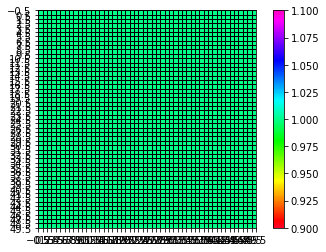

In [218]:
%matplotlib inline
def print_grid(all_agent_info):
    grid=np.zeros((length,width))
    i=0
    for i in range(number_of_agents):
        grid[all_agent_info[i].coord[0]][all_agent_info[i].coord[1]]=all_agent_info[i].wealth
    #cmap = colors.ListedColormap(['white','red', 'blue'])
    #bounds = [-0.1,0.1,1.1,2.1]
    #norm = colors.BoundaryNorm()

    fig, ax = plt.subplots()
    zmin,zmax= np.min(grid), np.max(grid)
    c=ax.imshow(grid,vmin=zmin,vmax=zmax,cmap='gist_rainbow')

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    ax.set_xticks(np.arange(-0.5, length, 1))
    ax.set_yticks(np.arange(-0.5, width, 1))
    plt.colorbar(c)
    plt.show()


print_grid(agents)

In [219]:
track

array([[1796, 1776, 1391, ...,  230, 2469, 1648],
       [ 344,  374, 1253, ...,  172, 1368,  511],
       [ 846, 1633,  541, ...,  977, 2071, 1974],
       ...,
       [2197, 1619,  395, ...,  317, 2182, 1951],
       [1936, 1349, 2323, ...,   75, 1486, 1837],
       [1652, 2324, 1142, ..., 1186,  572, 1766]])

Make function that returns the valid neighbourhood of every agent as a numpy array

In [220]:
def neighborhood_of_agent(agent_id):
    coord=agents[agent_id].coord
    neighbours=np.array([[-1,-1],[-1,0],[-1,1],[0,1],[0,-1],[1,-1],[1,0],[1,1]])
    if coord[0]==0:
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,-1],[-1,0],[-1,1]])))))
    elif coord[0]==(width-1):
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[1,-1],[1,0],[1,1]])))))
    if coord[1]==0:
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,-1],[0,-1],[1,-1]])))))
    elif coord[1]==(length-1):
          neighbours=np.array(list(set(map(tuple, neighbours)) - set(map(tuple,np.array([[-1,1],[0,1],[1,1]])))))
    return(neighbours)


In [221]:
i=0
j=0

print(agents[track[i][j]].coord,neighborhood_of_agent(track[i][j]))

[0, 0] [[0 1]
 [1 0]
 [1 1]]


# Code for finding Hamiltonian of the initial system

In [222]:
hamiltonian=0
for a in agents:
    nbhood=neighborhood_of_agent(a.agent_id)
    for nghbr in nbhood:
        neighbor=a.coord+nghbr
        neighbor_wealth=agents[track[neighbor[0]][neighbor[1]]].wealth
        hamiltonian= hamiltonian+(((neighbor_wealth-a.wealth)/avg_wealth)**2)

hamiltonian/=2

hamiltonian



     
          

0.0

Code to calculate local difference in wealth if agent_id is in coordinate (x,y)

In [223]:
def local_diff(agent_id,coord):
     local_diff=0
     nbhood=neighborhood_of_agent(track[coord[0]][coord[1]]) #this shd be neighborhood of coord
     a=agents[agent_id]
     for nghbr in nbhood:
        neighbor= coord+nghbr
        neighbor_wealth=agents[track[neighbor[0]][neighbor[1]]].wealth
        local_diff= local_diff+(((neighbor_wealth-a.wealth)/avg_wealth)**2)
     return(local_diff)




# Make code to shift the agents based on the minimization of Hamiltonian

Hamiltonian changes only on basis of th exchanged agents and their neighbors

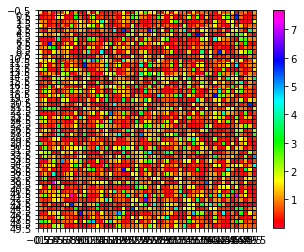

In [224]:
for T in Temperaturetime:
  gini_overtime=[] #0 is most equal meanwhile 1 is most unequal
  for i,a in enumerate(agents):
    a.wealth=wealth[i]
    a.savings=savingprop[i]
  Temperature=T
  Money_distribution_pdf_temperature_ensemble=[]
  numberoftradesperagent_afterequilibrium=np.zeros(len(agents))
  mean_path_length_every_agent=np.zeros(len(agents))
  
  
  for i in range(5000000):
    shifter1=np.random.randint(0,number_of_agents)
    shifter2=np.random.randint(0,number_of_agents)
    coord1=np.copy(agents[shifter1].coord)
    coord2=np.copy(agents[shifter2].coord)
    b4localdiff1=local_diff(shifter1,agents[shifter1].coord)
    b4localdiff2=local_diff(shifter2,agents[shifter2].coord)
    afterlocaldiff1=local_diff(shifter2,agents[shifter1].coord)
    afterlocaldiff2=local_diff(shifter1,agents[shifter2].coord)
    difference=afterlocaldiff1+afterlocaldiff2-b4localdiff1-b4localdiff2
    probability=0
    if Temperature==0: #metropolis-hastings rule
        if difference<0:
            probability=1
    
    if Temperature==-1: #temperature = infinity is denoted by -1
       probability=1

    if Temperature!=0 and Temperature!=-1:
        try:
         e=math.exp(-difference/Temperature)
        except OverflowError:
         e=math.inf
        probability=min(1,(e))
        
    r=random.uniform(0,1)
    if(r<probability): #if hamiltonian minimized then(before)
        hamiltonian+= difference
        agents[shifter1].coord=coord2
        agents[shifter2].coord=coord1
        track[coord1[0]][coord1[1]]=shifter2
        track[coord2[0]][coord2[1]]=shifter1
   
   #Below is code fpor implementing kinetic exchange as said by paper
    neghbor=neighborhood_of_agent(shifter1)
    rand=random.randint(1,len(neghbor))
    exchanger_coord=neghbor[rand-1]+agents[shifter1].coord
    exchanger1=agents[track[exchanger_coord[0]][exchanger_coord[1]]]
    exchanger2=agents[shifter1]
    epsilon=random.random()
    delw=(((1-epsilon)*exchanger2.wealth)*(1-exchanger2.savings))-((epsilon*exchanger1.wealth)*(1-exchanger1.savings))
    exchanger1.wealth+=delw
    exchanger2.wealth-=delw

  for j in range(56000):
    shifter1=np.random.randint(0,number_of_agents)
    shifter2=np.random.randint(0,number_of_agents)
    coord1=np.copy(agents[shifter1].coord)
    coord2=np.copy(agents[shifter2].coord)
    b4localdiff1=local_diff(shifter1,agents[shifter1].coord)
    b4localdiff2=local_diff(shifter2,agents[shifter2].coord)
    afterlocaldiff1=local_diff(shifter2,agents[shifter1].coord)
    afterlocaldiff2=local_diff(shifter1,agents[shifter2].coord)
    difference=afterlocaldiff1+afterlocaldiff2-b4localdiff1-b4localdiff2
    probability=0
    if Temperature==0: #metropolis-hastings rule
        if difference<0:
            probability=1
    

    if Temperature!=0 and Temperature!=-1:
      try:
        e=math.exp(-difference/Temperature)
      except OverflowError:
        e=math.inf
      probability=min(1,e)
    r=random.uniform(0,1)
    if(r<probability): #if hamiltonian minimized then(after)
        hamiltonian+= difference
        agents[shifter1].coord=coord2
        agents[shifter2].coord=coord1
        track[coord1[0]][coord1[1]]=shifter2
        track[coord2[0]][coord2[1]]=shifter1
   
   #Below is code for implementing kinetic exchange as said by paper
    
    neghbor=neighborhood_of_agent(shifter1)
    rand=random.randint(1,len(neghbor))
    exchanger_coord=neghbor[rand-1]+agents[shifter1].coord
    exchanger1=agents[track[exchanger_coord[0]][exchanger_coord[1]]]
    exchanger2=agents[shifter1]
    epsilon=random.random()
    delw=(((1-epsilon)*exchanger2.wealth)*(1-exchanger2.savings))-((epsilon*exchanger1.wealth)*(1-exchanger1.savings))
    numberoftradesperagent_afterequilibrium[shifter1]+=1
    numberoftradesperagent_afterequilibrium[track[exchanger_coord[0]][exchanger_coord[1]]]+=1
    exchanger1.wealth+=delw
    exchanger2.wealth-=delw
    zx=track[exchanger_coord[0]][exchanger_coord[1]]



    #code for calculating social mobility metrics
    if numberoftradesperagent_afterequilibrium[shifter1]==1:
       mean_path_length_every_agent[shifter1]=abs(delw)
    if numberoftradesperagent_afterequilibrium[zx]==1:
       mean_path_length_every_agent[zx]=abs(delw)
    if numberoftradesperagent_afterequilibrium[shifter1]!=1 and numberoftradesperagent_afterequilibrium[zx]!=1:
       mean_path_length_every_agent[shifter1]=(mean_path_length_every_agent[shifter1]+(abs(delw)/(numberoftradesperagent_afterequilibrium[shifter1]-1)))*((numberoftradesperagent_afterequilibrium[shifter1]-1)/numberoftradesperagent_afterequilibrium[shifter1])
       mean_path_length_every_agent[zx]=(mean_path_length_every_agent[zx]+(abs(delw)/(numberoftradesperagent_afterequilibrium[zx]-1)))*((numberoftradesperagent_afterequilibrium[zx]-1)/numberoftradesperagent_afterequilibrium[zx])
    
    
    #gini index code
    money=np.zeros(number_of_agents)
    for i in range(number_of_agents):
      money[i]=agents[i].wealth
    total_wealth=np.sum(money)
    wealthpercentile=np.copy(money)
    wealthpercentile=np.sort(wealthpercentile)
    if j%2499==0:
      Money_distribution_pdf_temperature_ensemble.append(money)
    gini_overtime.append((2*np.dot(wealthpercentile,weights)/(total_wealth*number_of_agents))-1)
  Money_distribution_pdf_temperature.append(np.average(np.array(Money_distribution_pdf_temperature_ensemble),axis=0))
  giniwrtTemp.append(np.mean(np.array(gini_overtime)))
  mean_path_length_avg_agent_over_Temperature.append(np.average(mean_path_length_every_agent))
  variance_mean_path_length_over_Temperature.append(np.var(mean_path_length_every_agent))
    



print_grid(agents)


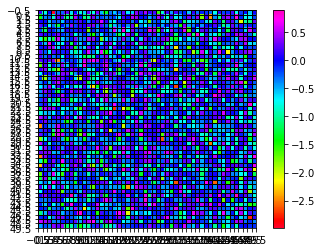

In [225]:
'''Make a grid of log wealth graph as inequality is too high to see any effect on linear scale'''
grid=np.zeros((length,width))
i=0
for i in range(number_of_agents):
  grid[agents[i].coord[0]][agents[i].coord[1]]=np.log(agents[i].wealth)/math.log(10)
#cmap = colors.ListedColormap(['white','red', 'blue'])
#bounds = [-0.1,0.1,1.1,2.1]
#norm = colors.BoundaryNorm()
fig, ax = plt.subplots()
zmin,zmax= np.min(grid), np.max(grid)
c=ax.imshow(grid,vmin=zmin,vmax=zmax,cmap='gist_rainbow')
# draw gridlines
ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
ax.set_xticks(np.arange(-0.5, length, 1))
ax.set_yticks(np.arange(-0.5, width, 1))
plt.colorbar(c)
plt.show()

[0.4064235213969978,
 0.4064329928586141,
 0.40643076049187576,
 0.4064308087655839,
 0.4064304552178877,
 0.4064390328968104,
 0.4064209614601111,
 0.40641925071789964,
 0.4064107049247603,
 0.4064100862906119,
 0.4064101565734253,
 0.4064102570263963,
 0.4064150596764853,
 0.4064141533697696,
 0.4064090114245329,
 0.40640304312540576,
 0.4064030565018557,
 0.4063904404951666,
 0.40639100594085886,
 0.40639232425933614,
 0.40640141893844484,
 0.40640139341818693,
 0.4063858516401835,
 0.4063858770490929,
 0.4063920085498445,
 0.4063919919428678,
 0.40638133764292617,
 0.40638540679965707,
 0.4063971914537563,
 0.4063987838110561,
 0.4064004216583952,
 0.4064014987248663,
 0.40639545670650157,
 0.406420143217213,
 0.40642040307171,
 0.40642052028123876,
 0.40642093697950665,
 0.40640959375053076,
 0.4064044812197827,
 0.40640532692269726,
 0.406408121479102,
 0.406410281126216,
 0.40641541570870476,
 0.40641212861164067,
 0.40638730003031265,
 0.4063870956719886,
 0.40638032151035186,


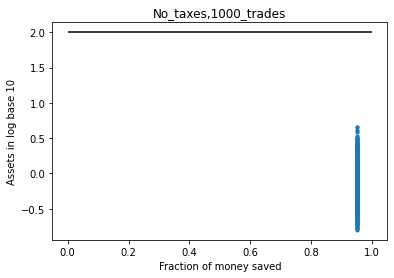

In [62]:
wealth=[]
for a in agents:
    wealth.append(a.wealth)

plt.scatter(savingprop,np.log(wealth)/math.log(10),marker='.')
plt.hlines(2,0,1,color='black')
plt.ylabel('Assets in log base 10')
plt.xlabel('Fraction of money saved')
plt.title('No_taxes,1000_trades')
plt.show()

In [60]:
neghbor=neighborhood_of_agent(track[0][0])
len(neghbor)

3

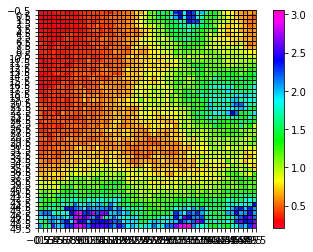

In [80]:
print_grid(agents)  #Graph after segregation and exchanges

# Relevant Graphs

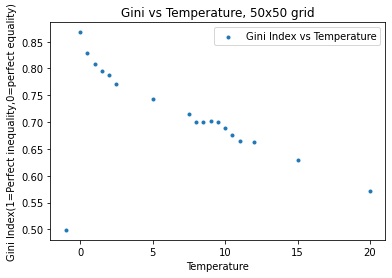

In [252]:
%matplotlib inline
plt.scatter(Temperaturetime,giniwrtTemp,marker='.',label='Gini Index vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Gini Index(1=Perfect inequality,0=perfect equality)') 
plt.legend()
plt.title('Gini vs Temperature, 50x50 grid')
plt.show()


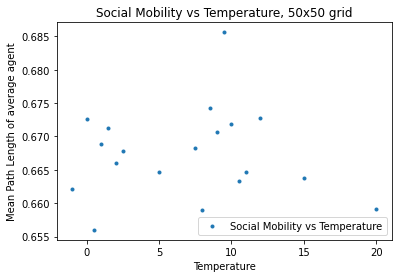

In [251]:
%matplotlib inline
plt.scatter(Temperaturetime,mean_path_length_avg_agent_over_Temperature,marker='.',label='Social Mobility vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Mean Path Length of average agent')
plt.legend()
plt.title('Social Mobility vs Temperature, 50x50 grid')
plt.show()

In [189]:
mean_path_length_avg_agent_over_Temperature

[0.6526092494794682,
 0.6620031288488131,
 0.6661567280193984,
 0.6728623631328101,
 0.6692010534829745,
 0.6774223285580218,
 0.6750090275601736,
 0.6661921202105459,
 0.6654026334863286,
 0.673468835400446,
 0.6746369693594125,
 0.6599414743834157,
 0.6689467932407568,
 0.6633569685994309]

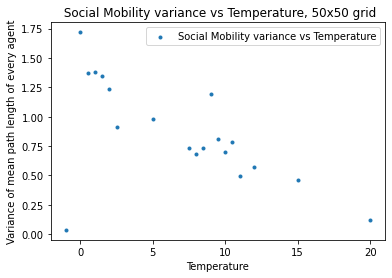

In [253]:
%matplotlib inline
plt.scatter(Temperaturetime,variance_mean_path_length_over_Temperature,marker='.',label='Social Mobility variance vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Variance of mean path length of every agent')
plt.legend()
plt.title(' Social Mobility variance vs Temperature, 50x50 grid')
plt.show()

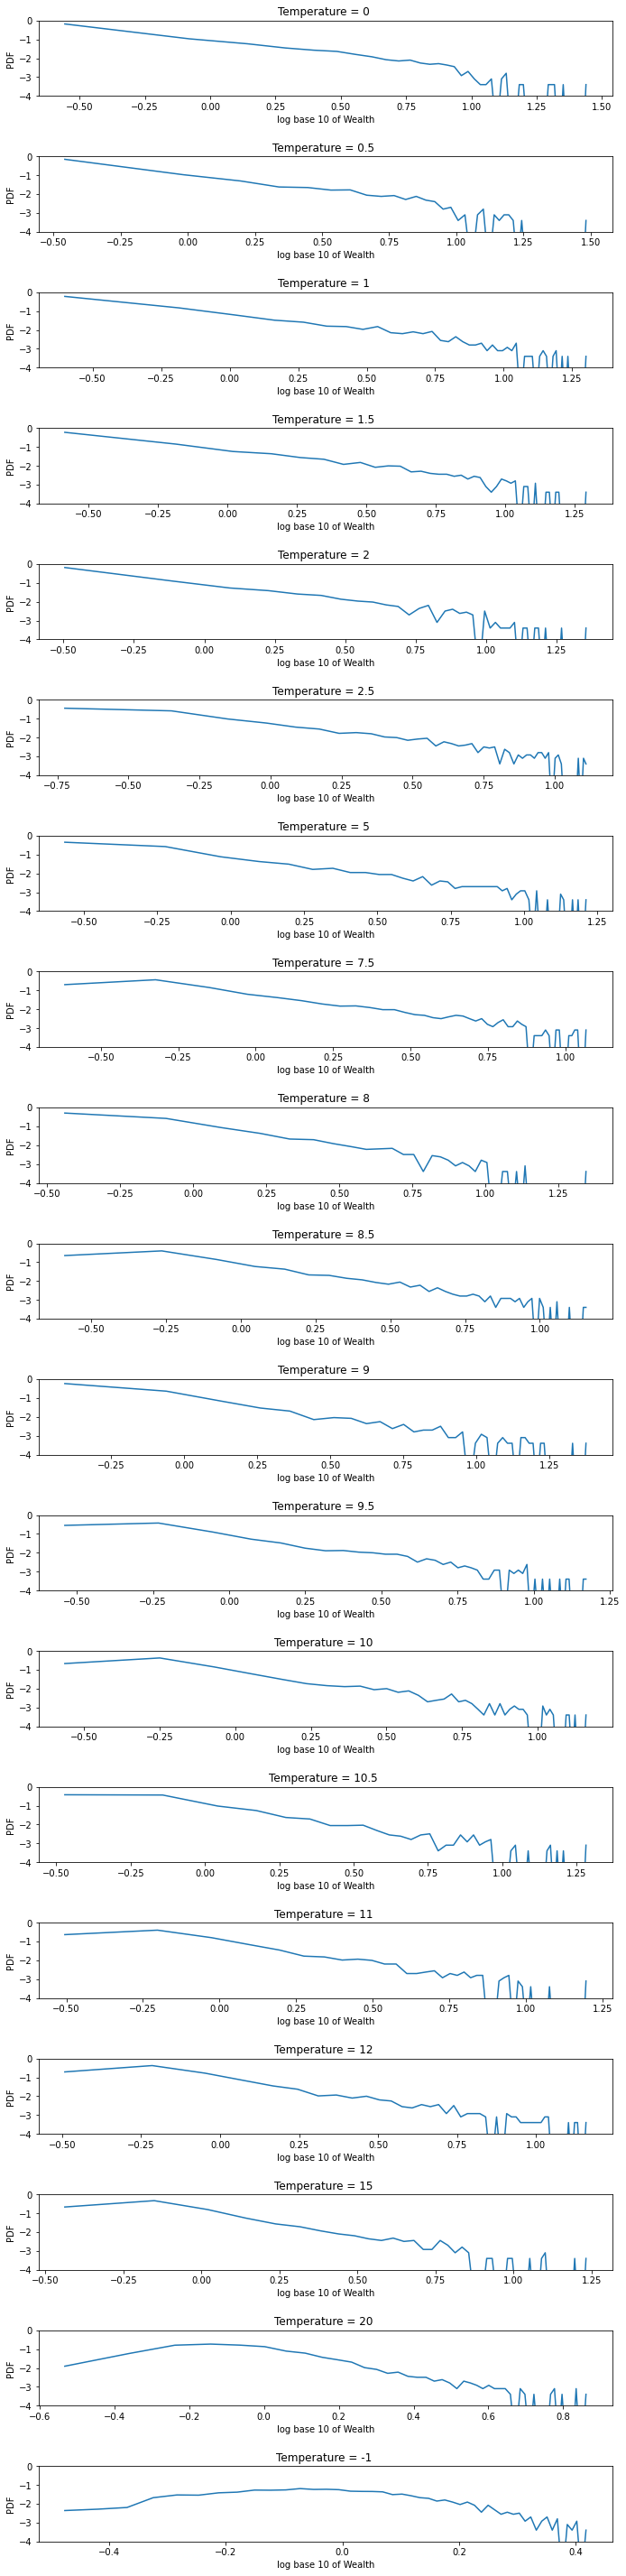

In [241]:
%matplotlib inline

fig = plt.figure(figsize=(10,40))
columns = 1
rows = len(Temperaturetime)
for i,T in enumerate(Temperaturetime):

  # Generate random normally distributed data
  data=Money_distribution_pdf_temperature[i]

  # Histogram
  heights,bins = np.histogram(data,bins=50)

  # Normalize
  heights = heights/float(sum(heights))
  binMids=bins[:-1]+np.diff(bins)/2.
  fig.add_subplot(rows, columns, i+1)
  plt.title('Temperature = {} '.format(T))
  plt.xlabel('log base 10 of Wealth')
  plt.ylabel('PDF')
  plt.ylim(-4,0)
  fig.tight_layout(pad=2.0)
  plt.plot(np.log10(np.array(binMids)),np.log10(heights+0.000001))

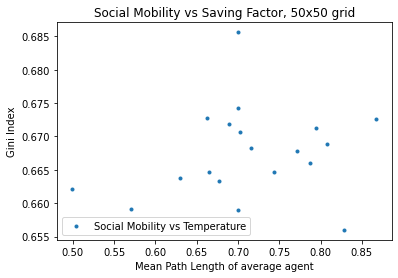

In [250]:
%matplotlib inline
plt.scatter(giniwrtTemp,mean_path_length_avg_agent_over_Temperature,marker='.',label='Social Mobility vs Temperature')
plt.ylabel('Gini Index')
plt.xlabel('Mean Path Length of average agent')
plt.legend()
plt.title('Social Mobility vs Saving Factor, 50x50 grid')
plt.show()

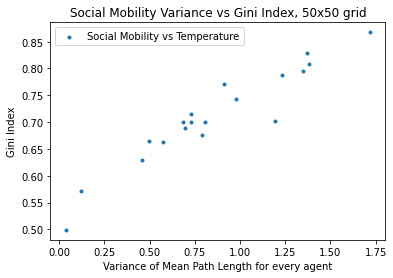

In [249]:
%matplotlib inline
plt.scatter(variance_mean_path_length_over_Temperature,giniwrtTemp,marker='.',label='Social Mobility Variance vs Gini Index')
plt.ylabel('Gini Index')
plt.xlabel('Variance of Mean Path Length for every agent')
plt.legend()
plt.title('Social Mobility Variance vs Gini Index, 50x50 grid')
plt.show()